In [1]:
import pandas as pd

# Read the CSV file
file_path = '../data/cleaned_df.csv'
df = pd.read_csv(file_path)

# Display Basic Information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        1590 non-null   object 
 1   job_location     1590 non-null   object 
 2   company_name     1590 non-null   object 
 3   salary_year_avg  1590 non-null   float64
 4   above_median     1590 non-null   bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 51.4+ KB
None
       salary_year_avg
count      1590.000000
mean     153653.360481
std       50855.750194
min       45000.000000
25%      125000.000000
50%      155000.000000
75%      173000.000000
max      890000.000000


- `.describe()` shows that the mean and median are almost equal and that the IQR (=$48,000) and std are almost equal as well.
    - Normal Distribution: Mode=Median=Mean (Symmetry) & IQR = 1.35*std
    - salary_year_avg: mean = 153653.4 < median = 155000.0 < mode = 157500.0
        - Also, min = 45000.0, Q1 = 125000.0, Q3 = 173000.0, max = 890000.0
- Both the minimum and maximum values of the dataset clearly indicate that there are outliers in the dataset.

In [2]:
# Basic Calculations

import numpy as np
from scipy import stats

# Salary Column
data = df['salary_year_avg']

basic_features = np.quantile(data, [0.00,0.25,0.50,0.75,0.85,0.95,1.00])
data_min = basic_features[0]
data_max = basic_features[-1]
Q1 = basic_features[1]
Q2 = basic_features[2]
Q3 = basic_features[3]
perc_85th = basic_features[4]
perc_95th = basic_features[5]
IQR = Q3 - Q1
data_mean = data.mean()
data_mode = stats.mode(data)

# Calculate the Whisker Limits
lower_whisker_limit = Q1 - (1.5 * IQR)
upper_whisker_limit = Q3 + (1.5 * IQR)

# Calculate the Minimum & Maximum of the Box Plot (max = Largest value within the upper whisker limit)
box_min = data[data >= lower_whisker_limit].min()
box_max = data[data <= upper_whisker_limit].max()
box_range = box_max - box_min

# Calculate Skewness & Kurtosis
skewness = data.skew()
kurt = data.kurtosis()

| Salary Distribution Features |  Values |
|:-----:|:-------:|
| Number of Entries | 1590 |
| Mean  | 154,000 |
| Standard Deviation  | 51,000 |
| Dataset Minimum   | 45,000 |
| Q1 = 25th Percentile | 125,000 |
| Q2 = 50th Percentile | 155,000 |
| Q3 = 75th Percentile | 173,000 |
| 85th Percentile | 190,000 |
| 95th Percentile | 225,000 |
| Dataset Maximum   | 890,000 |
| Mode | 157,500 |
| IQR   | 48,000   |
| Box Plot Minimum | 55,000 |
| Box Plot Maximum | 245,000 |
| Box Plot Range   | 190,000 |
| Skewness | 3.1 |
| Kurtosis | 31.4 |
| Number of Lower Outliers | 1 |
| Number of Upper Outliers | 49 |

Since the task is to associate the Senior Data Scientist skills with the highest-paying jobs, the outliers will not be removed (excluding the maximum of the dataset, which has a value that is twice the value of the second-largest outlier).  

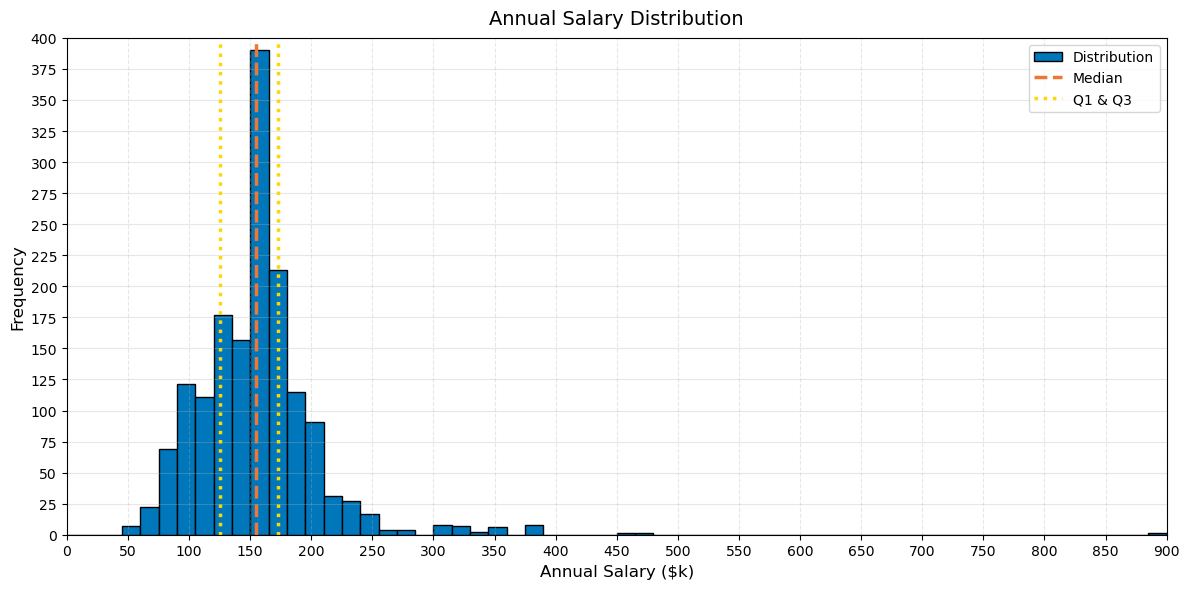

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the bins

width = 15_000
# np.arange allows you to define the step size (width) and infers the number of steps (bins).
salary_bins = np.arange(0, (data_max + width), width) #  Values up to, and including, the dataset maximum (data_max)

# 2. Visualize the salary distribution

# Customize the plot
plt.figure(figsize=(12, 6))
plt.title('Annual Salary Distribution', fontsize=14, pad=10) # pad controls the spacing between the title and the top of the plot area (measured in points)
plt.xlabel('Annual Salary ($k)', fontsize=12)
plt.ylabel('Frequency', fontsize=12) # Number of data in each bin
plt.grid(axis='y', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Customize the x-axis 
ticks = np.arange(0,(900_000 + 50_000),50_000)
labels = [f'{int(x/1000)}' for x in ticks] # Create tick labels (converting to $k format)
plt.xticks(ticks, labels)
plt.xlim([0, 900_000]) 

plt.yticks(np.arange(0,425,25))
plt.ylim([0, 400])

# Histogram
plt.hist(data, bins = salary_bins, edgecolor='black', color='#0077BB',alpha=1, label='Distribution')

# Vertical Lines
plt.axvline(Q2, color='#EE7733', linestyle='--', linewidth = 2.5, label='Median')
plt.axvline(Q1, color='#FFD700', linestyle=':', linewidth = 2.5, label='Q1 & Q3')
plt.axvline(Q3, color='#FFD700', linestyle=':', linewidth = 2.5, label='_nolegend_')

# Legend
plt.legend()

plt.tight_layout()
plt.savefig("../assets/salary_distribution.pdf", format='pdf', dpi=300, bbox_inches='tight') #tight layout around the figure (ensures that any extra whitespace around the figure is minimized when saving it)
plt.show()

- Change the bin width to visualize the different modes that exist in the dataset.

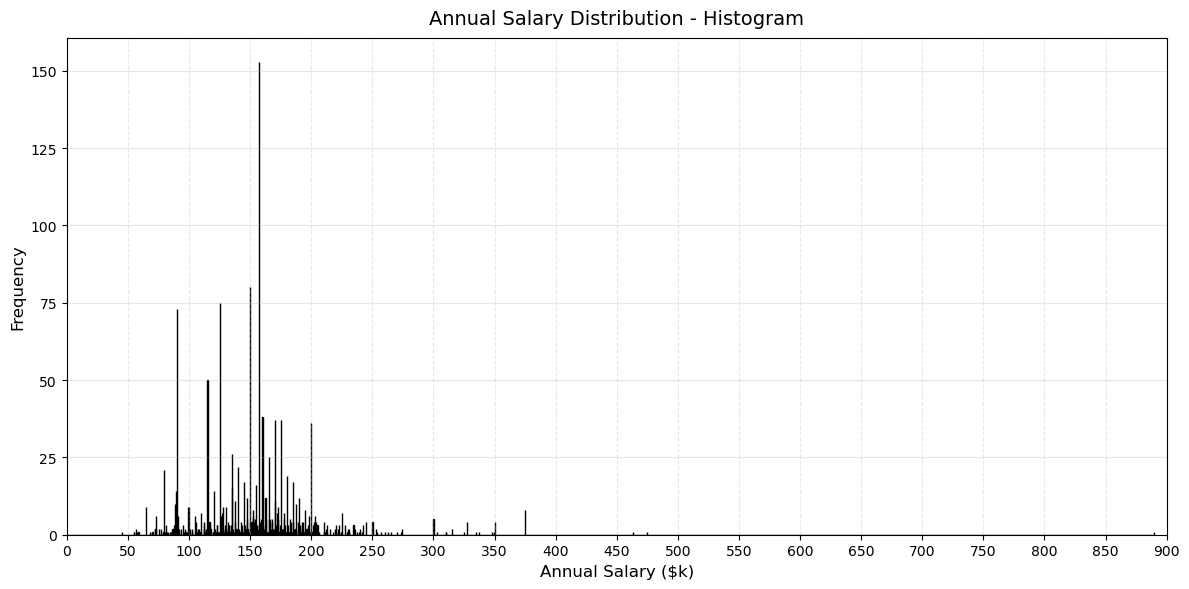

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the bins

width = 100 # Visualize the different modes that exist in the dataset
# np.arange allows you to define the step size (width) and infers the number of steps (bins).
salary_bins = np.arange(0, (data_max + width), width) #  Values up to, and including, the dataset maximum (data_max)

# 2. Visualize the salary distribution

# Customize the plot
plt.figure(figsize=(12, 6))
plt.title('Annual Salary Distribution - Histogram', fontsize=14, pad=10) # pad controls the spacing between the title and the top of the plot area (measured in points)
plt.xlabel('Annual Salary ($k)', fontsize=12)
plt.ylabel('Frequency', fontsize=12) # Number of data in each bin
plt.grid(axis='y', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Customize the x-axis 
ticks = np.arange(0,(900_000 + 50_000),50_000)
labels = [f'{int(x/1000)}' for x in ticks] # Create tick labels (converting to $k format)
plt.xticks(ticks, labels)
plt.xlim([0, 900_000]) 

plt.yticks(np.arange(0,375,25))

# Visualize
plt.hist(data, bins = salary_bins, edgecolor='black', color='#0077BB',alpha = 1)
plt.tight_layout()
plt.savefig("../assets/modes.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

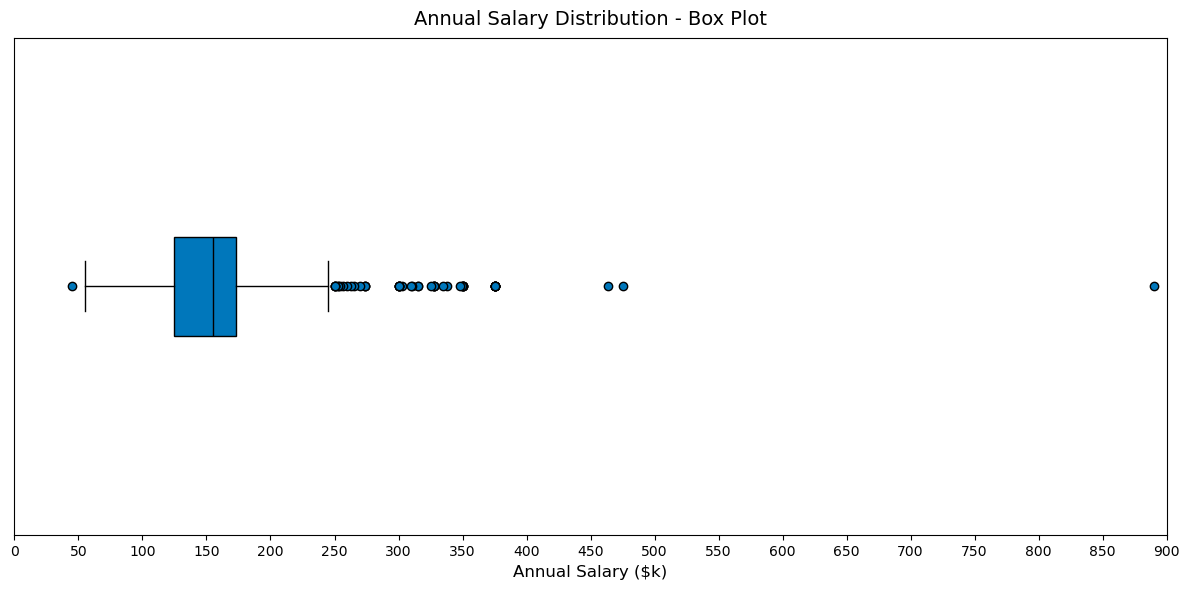

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Customize the plot
plt.figure(figsize=(12, 6))
plt.title('Annual Salary Distribution - Box Plot', fontsize=14, pad=10)
plt.xlabel('Annual Salary ($k)', fontsize=12)
plt.tick_params(left=False, labelleft=False) # Removes the tick marks and label ('1') on the y-axis respectively

# Customize the x-axis 
ticks = np.arange(0,(900_000 + 50_000),50_000)
labels = [f'{int(x/1000)}' for x in ticks] # Create tick labels (converting to $k format)
plt.xticks(ticks, labels)
plt.xlim(left=0)
plt.tight_layout()

# Create & Customize the Box Plot
plt.boxplot(data,
            vert=False, # Horizontal orientation 
            widths=0.2, # Sets the height of the box (width for horizontal box plots)
            patch_artist=True, # Enables filling the box with color
            boxprops=dict(facecolor='#0077BB',alpha=1), # Box appearance
            medianprops=dict(color='black'), # Black median line
            flierprops=dict(marker='o', markerfacecolor='#0077BB',alpha=1) # Outlier style
            )

plt.savefig("../assets/boxplot.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

- Combine the two plots in one figure:

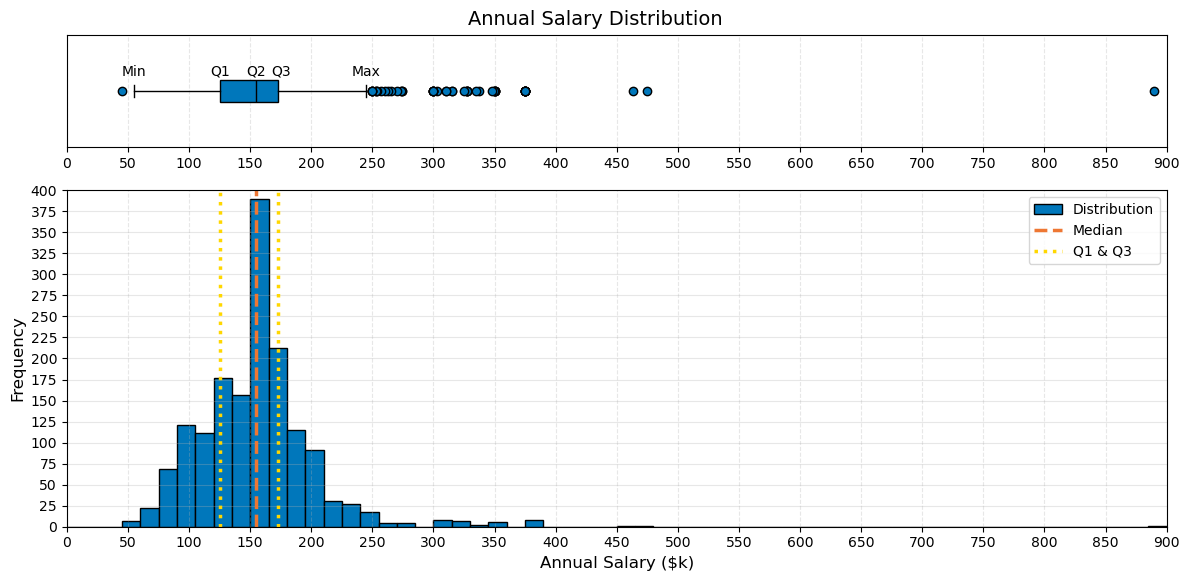

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#-------------------
#region Figure, axes, tick marks, and labels

# Create figure and axes objects
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), height_ratios=[1, 3])
fig.suptitle('Annual Salary Distribution', fontsize=14, y=0.96) # y controls the vertical position of the title (measured in figure coordinates)

# Tick marks and labels for the two x-axes
ticks = np.arange(0,(900_000 + 50_000),50_000)
labels = [f'{int(x/1000)}' for x in ticks] # Create tick labels (converting to $k format)
#endregion
#-------------------
#region Box Plot (Top)

# Create & Customize the Box Plot
ax1.boxplot(data,
            vert=False, # Horizontal orientation 
            widths=0.2, # Sets the height of the box (width for horizontal box plots)
            patch_artist=True, # Enables filling the box with color
            boxprops=dict(facecolor='#0077BB',alpha=1), # Box appearance
            medianprops=dict(color='black'), # Black median line
            flierprops=dict(marker='o', markerfacecolor='#0077BB',alpha=1), # Outlier style
            label='_nolegend_'
            )

# Customize Further
ax1.tick_params(left=False, labelleft=False) # Removes the tick marks and label ('1') on the y-axis respectively
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels)
ax1.grid(axis='x', linestyle='--', alpha=0.3)

# Add text labels for the quartiles (Q1, Q2, and Q3) with a small vertical offset
vertical_offset_quartiles = 0.11  # Moves label vertically above the box plot
quartiles = [Q1,Q2,Q3]

for index_Q, Q in enumerate(quartiles,start=1):
        if (index_Q == 3):
                ax1.text(Q + 2_500, 1 + vertical_offset_quartiles, # With 1 representing the vertical position of the box plot 
                f'Q{index_Q}',
                ha='center', va='bottom', fontsize=10) # Horizontally aligns the text center & Vertically aligns the text from the bottom
        else:
                ax1.text(Q, 1 + vertical_offset_quartiles, # With 1 representing the vertical position of the box plot 
                        f'Q{index_Q}',
                        ha='center', va='bottom', fontsize=10) # Horizontally aligns the text center & Vertically aligns the text from the bottom

# Add text labels for the minimum and maximum values of the box plot (box_min and box_max) with a small vertical offset
vertical_offset_minmax = 0.11  # Moves label vertically above the box plot
minmax = [box_min,box_max]

for index_M, M in enumerate(minmax,start=1):
        if (index_M == 1):
                ax1.text(M, 1 + vertical_offset_minmax, 
                        'Min',
                        ha='center', va='bottom', fontsize=10)
        elif (index_M == 2):
                ax1.text(M, 1 + vertical_offset_minmax, 
                        'Max',
                        ha='center', va='bottom', fontsize=10)
#endregion
#-------------------
#region Histogram (Bottom)

# 1. Define the bins

width = 15_000
# np.arange allows you to define the step size (width) and infers the number of steps (bins).
salary_bins = np.arange(0, (data_max + width), width) #  Values up to, and including, the dataset maximum (data_max)

# 2. Visualize the salary distribution

# Customize the Histogram (ax2)

# a. X-Axis (Labels, tick marks, axis limits, and grid)
ax2.set_xlabel('Annual Salary ($k)', fontsize=12)
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels)
ax2.set_xlim([0, 900_000]) 
ax2.grid(axis='x', linestyle='--', alpha=0.3)

# b. Y-Axis (Labels, tick marks, axis limits, and grid)
ax2.set_ylabel('Frequency', fontsize=12) # Number of data in each bin
ax2.set_yticks(np.arange(0,425,25))
ax2.set_ylim([0, 400])
ax2.grid(axis='y', alpha=0.3)

# Create the Histogram
ax2.hist(data,
         bins = salary_bins,
         edgecolor='black',
         color='#0077BB',alpha=1,
         label='Distribution'
        )

# Vertical Lines
ax2.axvline(Q2, color='#EE7733', linestyle='--', linewidth = 2.5, label='Median')
ax2.axvline(Q1, color='#FFD700', linestyle=':', linewidth = 2.5, label='Q1 & Q3')
ax2.axvline(Q3, color='#FFD700', linestyle=':', linewidth = 2.5, label='_nolegend_')

# Legend
ax2.legend()

# Align the x-axes of both plots
ax1.set_xlim(ax2.get_xlim())

#endregion
#-------------------
#region Save & Plot
fig.tight_layout(h_pad=1) # Create a tight layout and set the vertical space between subplots to 1 inch

# Save & Show
plt.savefig("../assets/histogram_and_boxplot.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()
#endregion